In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [44]:
newtrain = torchvision.datasets.CIFAR10(root='./test', train = True, download = True)

In [63]:
print(newtrain.train_data[0][0][0])

[59 62 63]


In [64]:
print(trainset.train_data[0][0][0])

[59 62 63]


In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 deer  frog horse   car


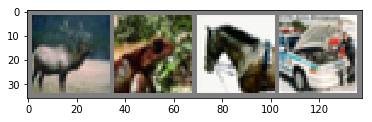

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [76]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 20, 5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(20, 50, 5, padding=2)
        self.conv3 = nn.Conv2d(50, 80, 5, padding=2)
        self.fc1 = nn.Linear(80 * 4 * 4, 300)
        self.fc2 = nn.Linear(300, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 80*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net = net.cuda()

In [77]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [78]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs.cuda(), labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.214
[1,  4000] loss: 1.874
[1,  6000] loss: 1.643
[1,  8000] loss: 1.522
[1, 10000] loss: 1.429
[1, 12000] loss: 1.366
[2,  2000] loss: 1.251
[2,  4000] loss: 1.194
[2,  6000] loss: 1.126
[2,  8000] loss: 1.092
[2, 10000] loss: 1.054
[2, 12000] loss: 1.018
[3,  2000] loss: 0.904
[3,  4000] loss: 0.902
[3,  6000] loss: 0.866
[3,  8000] loss: 0.879
[3, 10000] loss: 0.855
[3, 12000] loss: 0.859
[4,  2000] loss: 0.701
[4,  4000] loss: 0.723
[4,  6000] loss: 0.712
[4,  8000] loss: 0.749
[4, 10000] loss: 0.731
[4, 12000] loss: 0.712
[5,  2000] loss: 0.585
[5,  4000] loss: 0.598
[5,  6000] loss: 0.605
[5,  8000] loss: 0.624
[5, 10000] loss: 0.627
[5, 12000] loss: 0.625
[6,  2000] loss: 0.474
[6,  4000] loss: 0.483
[6,  6000] loss: 0.503
[6,  8000] loss: 0.526
[6, 10000] loss: 0.521
[6, 12000] loss: 0.549
[7,  2000] loss: 0.373
[7,  4000] loss: 0.411
[7,  6000] loss: 0.414
[7,  8000] loss: 0.443
[7, 10000] loss: 0.458
[7, 12000] loss: 0.450
[8,  2000] loss: 0.288
[8,  4000] 

In [79]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data.cuda(), 1)
    total += labels.size(0)
    correct += (predicted == labels.cuda()).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 73 %
